### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Load the CIFAR-10 dataset using Keras: Data Preprocessing

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 1056s 6us/step


(50000, 32, 32, 3)

50000 images of 32x32 pixels, consisting of 3 color channels

In [4]:
x_train[0].shape

(32, 32, 3)

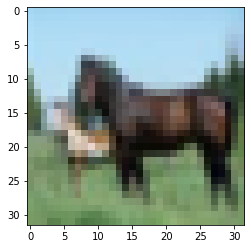

In [7]:
plt.imshow(x_train[12])

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

### Creating and Training the model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

# Input layer
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [17]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 21s 428us/sample - loss: 1.4904 - accuracy: 0.4580 - val_loss: 1.2701 - val_accuracy: 0.5411
Epoch 2/15
50000/50000 [==============================] - 7s 139us/sample - loss: 1.1711 - accuracy: 0.5856 - val_loss: 1.1381 - val_accuracy: 0.5962
Epoch 3/15
50000/50000 [==============================] - 7s 137us/sample - loss: 1.0187 - accuracy: 0.6425 - val_loss: 1.0562 - val_accuracy: 0.6311
Epoch 4/15
50000/50000 [==============================] - 7s 132us/sample - loss: 0.9017 - accuracy: 0.6852 - val_loss: 0.9995 - val_accuracy: 0.6512
Epoch 5/15
50000/50000 [==============================] - 7s 131us/sample - loss: 0.8067 - accuracy: 0.7183 - val_loss: 0.9568 - val_accuracy: 0.6763
Epoch 6/15
50000/50000 [==============================] - 7s 137us/sample - loss: 0.7266 - accuracy: 0.7477 - val_loss: 0.9186 - val_accuracy: 0.6907
Epoch 7/15
50000/50000 [=========================

### Evaluating the model

In [18]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.490395,0.45802,1.270099,0.5411
1,1.171149,0.58560,1.138086,0.5962
2,1.018726,0.64250,1.056235,0.6311
3,0.901705,0.68520,0.999520,0.6512
4,0.806664,0.71828,0.956828,0.6763


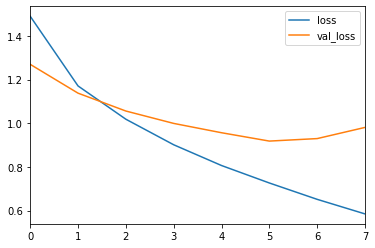

In [19]:
metrics[['loss','val_loss']].plot()

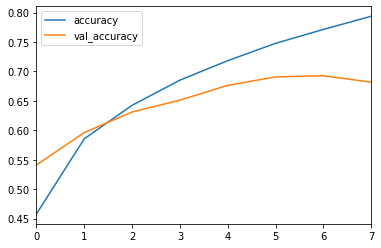

In [20]:
metrics[['accuracy','val_accuracy']].plot()

In [21]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9811484678268433, 0.6817]

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
y_pred = model.predict_classes(x_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1000
           1       0.86      0.75      0.80      1000
           2       0.64      0.51      0.57      1000
           3       0.47      0.48      0.47      1000
           4       0.67      0.64      0.65      1000
           5       0.54      0.64      0.59      1000
           6       0.74      0.79      0.76      1000
           7       0.79      0.71      0.75      1000
           8       0.85      0.68      0.75      1000
           9       0.70      0.83      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [26]:
print(confusion_matrix(y_test, y_pred))

[[788  13  46  27  17  11   7   7  31  53]
 [ 37 753   6   6   2   9  13   2  29 143]
 [ 79  11 513 103  85  90  70  15  14  20]
 [ 35   9  44 476  72 227  66  32  10  29]
 [ 30   2  56  81 640  56  56  62  10   7]
 [ 18   2  40 166  47 637  28  43   6  13]
 [ 13   7  37  66  41  34 786   6   5   5]
 [ 25   3  29  49  46  87  13 711   4  33]
 [166  32  16  15   4  13  10   3 678  63]
 [ 44  43   9  17   4   9  11  16  12 835]]


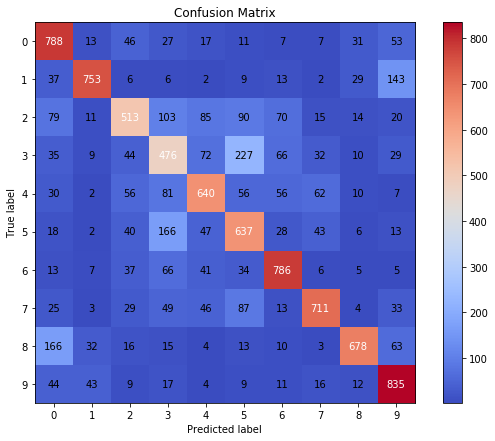

In [36]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False,figsize=(10,7),cmap='coolwarm')

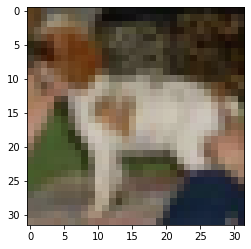

In [37]:
new_image = x_test[12]
plt.imshow(new_image)

In [38]:
model.predict_classes(new_image.reshape(1,32,32,3))

array([5], dtype=int64)